In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
%matplotlib inline

In [2]:
features =[]
raw=[]
with open('list_attr_celeba.txt') as file:
    print(file.readline())
    print(file.readline())
    for line in file:
        features.append([max(0,float(x)) for x in line.split()[1:]])
data = np.array(features)    

202599

5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young 



In [6]:
clustering = DBSCAN(eps=1.73, min_samples=10).fit(data)

Text(0, 0.5, 'Distance')

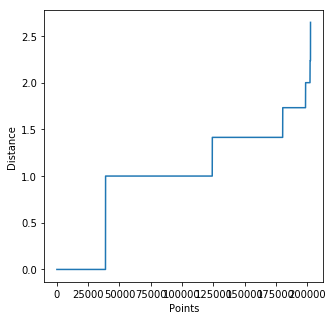

In [3]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.7320508075688772


<Figure size 360x360 with 0 Axes>

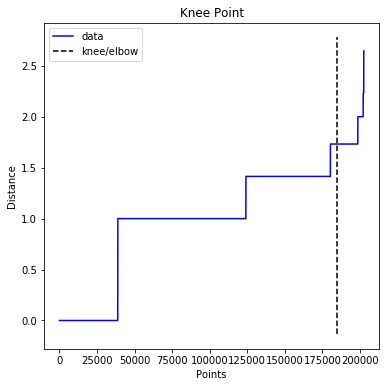

In [5]:
!python -m pip install kneed
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

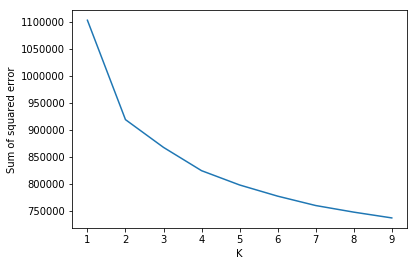

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

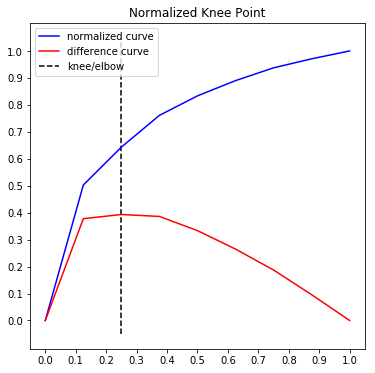

In [10]:
kn = KneeLocator(range(1, 10), sse,  # put range in variable
                        curve='convex',
                        direction='decreasing', interp_method='interp1d')
kn.plot_knee_normalized()

In [12]:
kn.knee

3